# Function


  Anomaly Detection & Time Series

Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

Ans Anomaly Detection (also called Outlier Detection) is the process of identifying patterns in data that do not conform to expected behavior.
Such unusual patterns (called anomalies or outliers) may indicate errors, fraud, network intrusions, equipment failure, or rare events.

It is widely used in fields like banking (fraud detection), healthcare (disease diagnosis), manufacturing (fault detection), and IT (system monitoring).

Types of Anomalies

1. Point Anomalies

Definition: A single data instance is considered anomalous if it is too far from the rest of the data.

Example:

A credit card transaction of ₹10,00,000 when a customer usually spends around ₹1,000–₹5,000.

A temperature reading of 100°C when the normal range is 20–40°C.

2. Contextual Anomalies

Definition: A data point is anomalous only in a specific context (depends on time, location, or situation).

Example:

Temperature: 35°C is normal in summer, but abnormal in winter.

Website traffic: 10,000 visits on a normal day may be high, but not abnormal during a big sale event.

3. Collective Anomalies

Definition: A collection (group/sequence) of data points together is anomalous, even if individual points are normal.

Example:

Network intrusion detection: A sudden burst of login attempts from different IPs within 1 minute.

Stock market: A sequence of unusual trading patterns that indicate insider trading.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

Ans 1. Isolation Forest (iForest)

Approach:

Works on the principle of isolation.

Randomly partitions the dataset by creating decision trees.

Anomalies are isolated faster because they require fewer splits (since they are far from dense clusters).

Best Use Cases:

High-dimensional data (e.g., 100+ features).

Fraud detection in transactions.

When you want scalability (works well with large datasets).

2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Approach:

Clusters data based on density.

Points in low-density regions (not belonging to any cluster) are treated as anomalies.

No need to specify the number of clusters in advance.

Best Use Cases:

Spatial/geographical data.

Data with irregular cluster shapes.

Good when you expect noise/outliers at edges of clusters (e.g., GPS data, sensor data).

3. Local Outlier Factor (LOF)

Approach:

Measures the local density of a point compared to its neighbors.

A point is anomalous if it is in a region much less dense than its neighbors.

Best Use Cases:

When anomalies depend on local context (not global).

Detecting contextual anomalies in time-series or customer segmentation.

Small-to-medium datasets (computationally heavier than iForest).

Question 3: What are the key components of a Time Series? Explain each with one example.

Ans A Time Series is a sequence of data points collected over time (daily, monthly, yearly, etc.).
It is usually decomposed into four key components:

1. Trend (T)

Definition: The long-term upward or downward movement in the data.

Example:

The steady increase in India’s mobile phone users over the past 15 years.

Stock prices of a successful company showing long-term growth.

2. Seasonality (S)

Definition: Regular and repeating short-term patterns at fixed intervals (day, week, year).

Example:

Ice cream sales peak every summer and drop in winter.

Online shopping spikes every Diwali/Christmas season.

3. Cyclical Component (C)

Definition: Fluctuations that occur in cycles but not at fixed intervals (usually tied to economic/market conditions).

Example:

Recession and boom cycles in the economy every few years.

Real estate prices going up and down depending on the market.

4. Irregular / Random Component (I)

Definition: Unpredictable variations caused by unexpected events.

Example:

A sudden drop in tourism due to COVID-19.

A spike in gold prices due to a war or political crisis.

Question 4: Define Stationary in time series. How can you test and transform a non stationary series into a stationary one?

Ans A stationary time series is one whose statistical properties (mean, variance, autocorrelation) remain constant over time.

In simple words: the series does not have trend or seasonality, and fluctuations are stable.

Stationarity is crucial because most time series models (like ARIMA) assume the input data is stationary.

How to Test for Stationarity?

1. Visual Inspection

Plot the series.

If you see a trend (upward/downward) or seasonality (repeated patterns), it is likely non-stationary.

2. Summary Statistics

Split the series into different time windows.

If the mean and variance change across windows, it is non-stationary.

3. Statistical Tests

Augmented Dickey-Fuller (ADF) Test

Null hypothesis (H0): Series is non-stationary.

If p-value < 0.05, reject H0 → series is stationary.

KPSS Test (opposite of ADF)

Null hypothesis (H0): Series is stationary.

How to Transform Non-Stationary to Stationary?

1. Differencing

Subtract the current value from the previous value:

Removes trend.

Example: Stock prices → use differences instead of raw values.

2. Log Transformation

Apply log to stabilize variance.

Example: Sales data with exponential growth.

3. Seasonal Differencing

Subtract value from the same season in the previous cycle:
 (where m = seasonal period).

Example: Monthly ice cream sales → subtract current month from last year’s same month.

4. Detrending

Fit a regression line and use residuals.

Example: Remove long-term upward growth in GDP.

5. Decomposition

Separate the series into trend + seasonality + residuals, and use only the residuals (stationary part).

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

Ans 1. AR (AutoRegressive Model)

Structure: Uses past values of the series to predict future values.

Equation:

Application:

Stock prices, weather, demand forecasting where past values strongly influence future.

2. MA (Moving Average Model)

Structure: Uses past forecast errors (residuals) to predict future values.

Equation:

Application:

Noise smoothing, financial returns, short-term forecasting where shocks/errors are important.

3. ARIMA (AutoRegressive Integrated Moving Average)

Structure: Combination of AR + MA + differencing (I) to make series stationary.

Parameters: (p, d, q)

p = lag of AR

d = differencing order

q = lag of MA

Application:

General-purpose forecasting: sales, stock prices, traffic, demand.

4. SARIMA (Seasonal ARIMA)

Structure: Extends ARIMA to handle seasonality.

Parameters: (p, d, q) × (P, D, Q, m)

(P, D, Q) = seasonal AR, differencing, MA

m = season length (e.g., 12 for monthly data with yearly seasonality).

Application:

Seasonal demand forecasting: ice cream sales, electricity usage, flight bookings.

5. SARIMAX (Seasonal ARIMA with Exogenous Variables)

Structure: SARIMA + external (exogenous) variables.

Equation includes predictors like promotions, holidays, or weather.

Application:

Forecasting sales using seasonality + marketing spend.

Electricity demand forecasting using temperature as external factor.

/tmp/ipython-input-1616118376.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="1949-01", end="1961-01", freq="M")


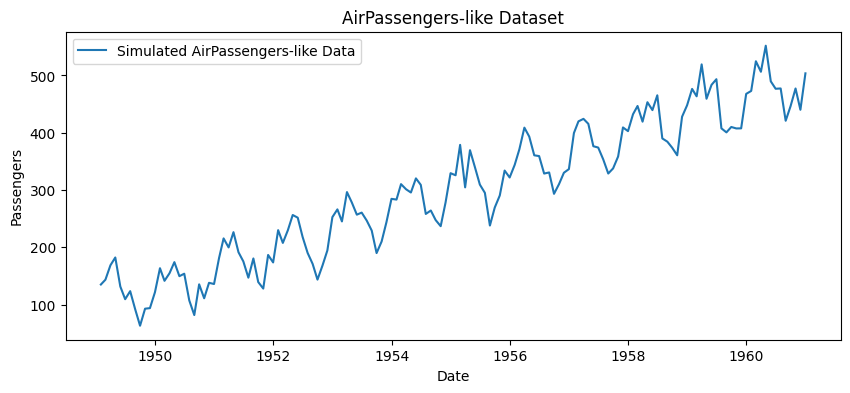

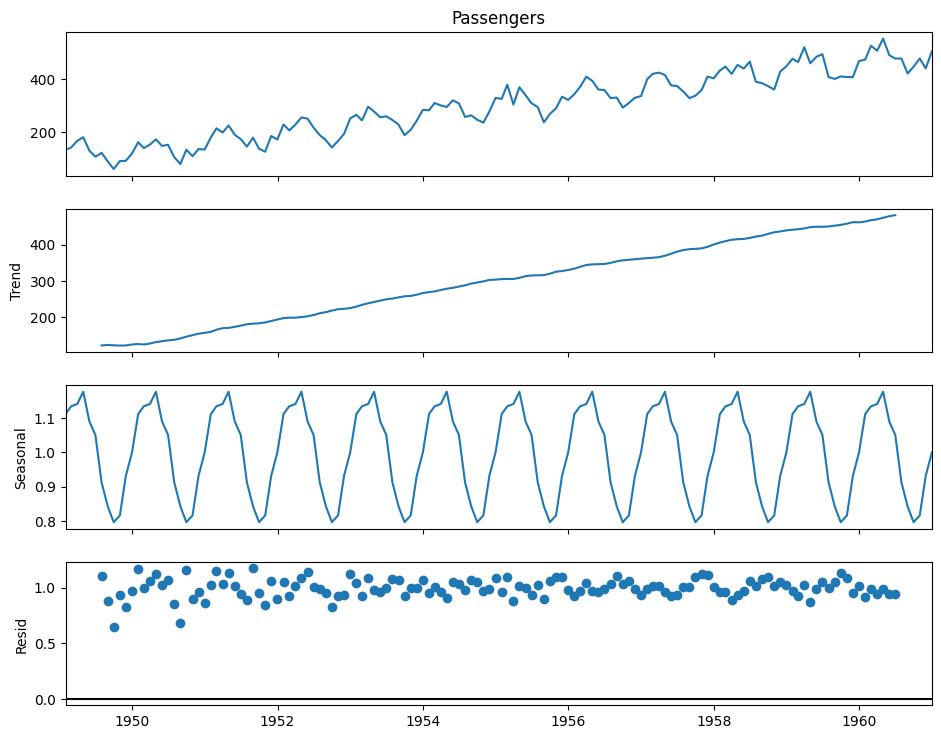

In [ ]:

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# Generate a simulated "AirPassengers-like" dataset (monthly data)
np.random.seed(42)
date_range = pd.date_range(start="1949-01", end="1961-01", freq="M")
trend = np.linspace(100, 500, len(date_range))  # upward trend
seasonality = 50 * np.sin(2 * np.pi * date_range.month / 12)  # yearly seasonality
noise = np.random.normal(0, 20, len(date_range))  # random noise
passengers = trend + seasonality + noise

df = pd.DataFrame({"Passengers": passengers}, index=date_range)

# Plot original series
plt.figure(figsize=(10, 4))
plt.plot(df, label="Simulated AirPassengers-like Data")
plt.title("AirPassengers-like Dataset")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# Decompose the series
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

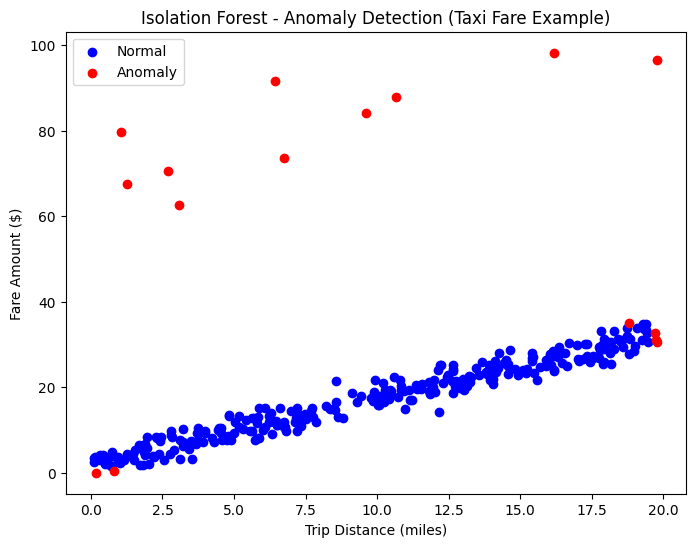

In [ ]:

Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Create synthetic dataset (fare vs distance)
np.random.seed(42)
n_samples = 300

# Normal data: fare ≈ base + rate * distance
distances = np.random.uniform(0, 20, n_samples)
fares = 2.5 + 1.5 * distances + np.random.normal(0, 2, n_samples)

# Inject anomalies (unusually high fares)
anomalous_distances = np.random.uniform(0, 20, 10)
anomalous_fares = np.random.uniform(50, 100, 10)  # very high fares

# Combine normal + anomalies
distances = np.concatenate([distances, anomalous_distances])
fares = np.concatenate([fares, anomalous_fares])

df = pd.DataFrame({"distance": distances, "fare": fares})

# Apply Isolation Forest
clf = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = clf.fit_predict(df[['distance', 'fare']])

# Separate anomalies
outliers = df[df['anomaly'] == -1]
inliers = df[df['anomaly'] == 1]

# Plot results
plt.figure(figsize=(8,6))
plt.scatter(inliers['distance'], inliers['fare'], c='blue', label='Normal')
plt.scatter(outliers['distance'], outliers['fare'], c='red', label='Anomaly')
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Isolation Forest - Anomaly Detection (Taxi Fare Example)")
plt.legend()
plt.show()

Model coefficients:
ar.L1        -0.2298
ma.L1        -0.0987
ar.S.L12     -0.5460
ma.S.L12      0.3959
sigma2      140.2945
dtype: float64

12-month forecast (mean and 95% CI):
            forecast  lower_95  upper_95
Month                                   
1961-01-01    447.22    424.01    470.44
1961-02-01    422.73    394.77    450.70
1961-03-01    457.70    424.80    490.60
1961-04-01    492.28    455.27    529.28
1961-05-01    505.56    464.83    546.30
1961-06-01    565.67    521.53    609.82
1961-07-01    651.99    604.68    699.30
1961-08-01    639.63    589.36    689.91
1961-09-01    543.06    489.98    596.14
1961-10-01    493.73    437.99    549.46
1961-11-01    426.94    368.66    485.21
1961-12-01    470.14    409.43    530.84


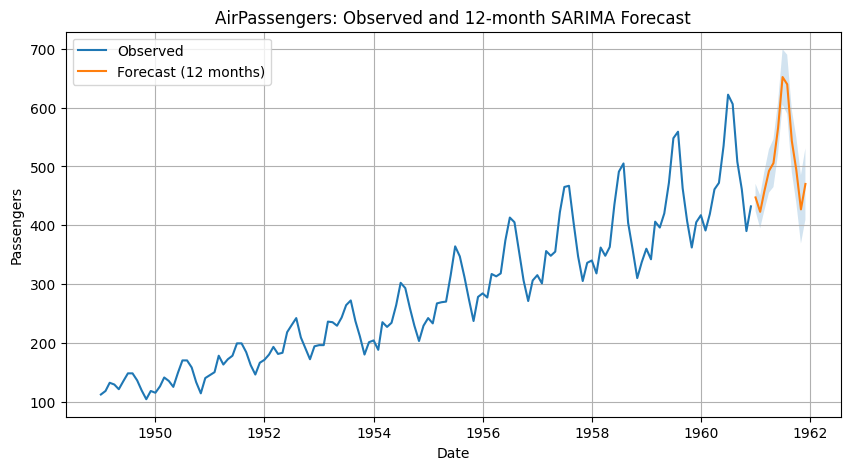

In [ ]:

Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.

# SARIMA forecast for AirPassengers (runs in a Jupyter / Python environment)
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset (try statsmodels dataset, otherwise fallback to hardcoded values)
try:
    from statsmodels.datasets import airpassengers
    dataset = airpassengers.load_pandas().data
    dataset.index = pd.date_range(start='1949-01-01', periods=len(dataset), freq='MS')
    series = dataset.iloc[:, 0].astype(float)
except Exception:
    vals = [112,118,132,129,121,135,148,148,136,119,104,118,
            115,126,141,135,125,149,170,170,158,133,114,140,
            145,150,178,163,172,178,199,199,184,162,146,166,
            171,180,193,181,183,218,230,242,209,191,172,194,
            196,196,236,235,229,243,264,272,237,211,180,201,
            204,188,235,227,234,264,302,293,259,229,203,229,
            242,233,267,269,270,315,364,347,312,274,237,278,
            284,277,317,313,318,374,413,405,355,306,271,306,
            315,301,356,348,355,422,465,467,404,347,305,336,
            340,318,362,348,363,435,491,505,404,359,310,337,
            360,342,406,396,420,472,548,559,463,407,362,405,
            417,391,419,461,472,535,622,606,508,461,390,432]
    series = pd.Series(vals, index=pd.date_range('1949-01-01', periods=len(vals), freq='MS'))

series.name = 'Passengers'

# Fit SARIMA: seasonal period = 12
order = (1,1,1)
seasonal_order = (1,1,1,12)

model = SARIMAX(series, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)

print("Model coefficients:")
print(res.params.round(4))

# Forecast next 12 months
n_forecast = 12
pred = res.get_forecast(steps=n_forecast)
pred_mean = pd.to_numeric(pred.predicted_mean)
pred_ci = pred.conf_int().astype(float)

forecast_index = pd.date_range(start=series.index[-1] + pd.offsets.MonthBegin(1), periods=n_forecast, freq='MS')
pred_mean.index = forecast_index
pred_ci.index = forecast_index

# Print forecast table
forecast_table = pd.DataFrame({
    'forecast': pred_mean,
    'lower_95': pred_ci.iloc[:,0],
    'upper_95': pred_ci.iloc[:,1]
})
forecast_table.index.name = 'Month'
print("\n12-month forecast (mean and 95% CI):")
print(forecast_table.round(2))

# Plot observed + forecast with 95% CI
plt.figure(figsize=(10,5))
plt.plot(series, label='Observed')
plt.plot(pred_mean, label='Forecast (12 months)')
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0].values, pred_ci.iloc[:,1].values, alpha=0.2)
plt.legend()
plt.title('AirPassengers: Observed and 12-month SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

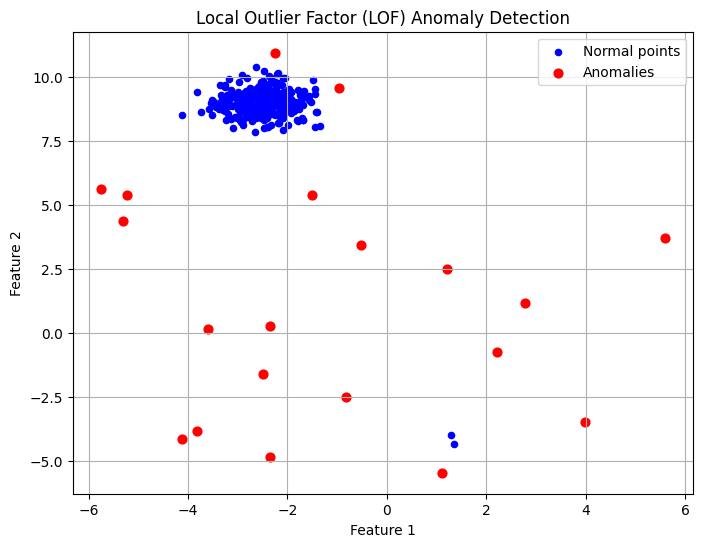

Total points: 320, Anomalies detected: 20


In [ ]:

Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.

# Local Outlier Factor (LOF) anomaly detection with visualization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor

# Step 1: Generate synthetic 2D dataset
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, random_state=42)

# Add random outliers
rng = np.random.RandomState(42)
outliers = rng.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X, outliers])

# Step 2: Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.06)
y_pred = lof.fit_predict(X)   # -1 = anomaly, 1 = normal

# Separate normal and anomaly points
normal = X[y_pred == 1]
anomalies = X[y_pred == -1]

# Step 3: Visualization
plt.figure(figsize=(8,6))
plt.scatter(normal[:,0], normal[:,1], c='blue', s=20, label="Normal points")
plt.scatter(anomalies[:,0], anomalies[:,1], c='red', s=40, label="Anomalies")
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

print(f"Total points: {len(X)}, Anomalies detected: {len(anomalies)}")

Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?

Ans 1. Real-Time Data Ingestion & Processing

Data arrives every 15 minutes from smart meters and sensors.

Use a stream processing framework (Kafka + Spark Streaming / Flink) to handle continuous input.

Data pipeline tasks:

Data cleaning (missing values, faulty sensors, outliers).

Feature engineering (rolling averages, lag features, time-of-day, day-of-week, holidays, weather encoding).

2. Anomaly Detection in Streaming Data

We need to detect sudden spikes or drops in real time.

Options:

1. Isolation Forest

Works well for high-dimensional data.

Trains on normal consumption patterns and isolates anomalies quickly.

2. Local Outlier Factor (LOF)

Good for density-based anomalies (local neighborhood comparisons).

Useful when regional clusters behave differently.

3. DBSCAN

Density-based clustering → detects groups vs outliers.

But computationally heavier for real-time, less preferred for streaming.

Best choice:

Use Isolation Forest for global anomaly detection.

Complement with LOF for region-specific anomalies.

Deploy as sliding window anomaly detection (e.g., last 24 hours window, retrain periodically).

3. Forecasting Model (Short-Term, 15-min Interval)

We need short-term load forecasting (next few hours).

ARIMA: Handles trend + seasonality but not exogenous factors.

SARIMA: Better, since it models seasonality (daily/weekly energy demand cycles).

SARIMAX: Best choice → includes exogenous features (weather, holidays, region) which strongly affect demand.

Best choice: SARIMAX

Forecast horizon: next 2–6 hours (8–24 intervals).

Train per region → aggregate forecasts for overall demand.

Can be retrained daily with the latest data.

4. Validation & Monitoring

We need to ensure the system stays accurate over time.

Backtesting: Rolling-origin cross-validation (train on past N days, test on next day).

Metrics:

Forecast: MAE, RMSE, MAPE.

Anomaly detection: Precision, Recall, F1 (using historical outage/fault labels if available).

Concept drift monitoring:

Track error distributions → if error suddenly increases, retrain the model.

Auto-alarm if anomalies exceed historical thresholds.

5. Business Value / Operational Impact

This solution helps the company in multiple ways:

Grid Stability: Detecting abnormal spikes (equipment failure, sudden load surges) avoids blackouts.
Forecast-driven Planning: Anticipating demand ensures optimal power generation → reduces cost of overproduction and prevents under-supply.
Dynamic Pricing: Short-term forecasts can support demand-based pricing models.
Operational Efficiency: Helps allocate backup generators, balance renewable integration (solar/wind variability).
Customer Satisfaction: Fewer outages, better reliability.

In [ ]:

# energy_minimal.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import traceback

def simulate_data(days=3, freq='15min', seed=42):
    np.random.seed(seed)
    date_rng = pd.date_range(start="2025-01-01", periods=int(24*60/15*days), freq=freq)
    n = len(date_rng)
    # daily pattern (sinusoidal) + small trend + noise
    minutes = date_rng.hour * 60 + date_rng.minute
    daily = 200 + 30 * np.sin(2 * np.pi * minutes / (24*60))
    noise = np.random.normal(0, 4, n)
    energy = daily + noise
    # temperature-like feature
    temp = 20 + 3 * np.sin(2 * np.pi * date_rng.dayofyear / 365) + np.random.normal(0, 1, n)
    df = pd.DataFrame({'timestamp': date_rng, 'energy': energy, 'temp': temp}).set_index('timestamp')
    # inject some anomalies
    idx = np.random.choice(n, size=max(3, n//80), replace=False)
    for i in idx:
        df.iloc[i, df.columns.get_loc('energy')] *= np.random.choice([0.35, 1.9])
    return df

def create_lag_features(df, lags=[1,2,3,4,8]):
    X = pd.DataFrame(index=df.index)
    for lag in lags:
        X[f'lag_{lag}'] = df['energy'].shift(lag)
    X['rolling_mean_4'] = df['energy'].rolling(window=4).mean().shift(1)
    X['hour'] = df.index.hour
    X['dayofweek'] = df.index.dayofweek
    X['temp'] = df['temp']
    X = X.dropna()
    y = df['energy'].loc[X.index]
    return X, y

def main():
    try:
        # 1) Simulate
        df = simulate_data(days=4)  # 4 days => 384 rows (96 per day)
        print("Data simulated:", df.shape)

        # 2) Anomaly detection (Isolation Forest)
        iso = IsolationForest(contamination=0.01, random_state=42)
        df['anomaly'] = iso.fit_predict(df[['energy']])
        df['is_anomaly'] = (df['anomaly'] == -1).astype(int)
        print("Anomalies detected:", int(df['is_anomaly'].sum()))

        # 3) Feature engineering for forecasting
        X, y = create_lag_features(df, lags=[1,2,3,4,8])
        # split: last 96 intervals (~1 day) as test
        test_size = 96
        X_train, X_test = X.iloc[:-test_size], X.iloc[-test_size:]
        y_train, y_test = y.iloc[:-test_size], y.iloc[-test_size:]
        print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

        # 4) Fit lightweight model (RandomForest)
        rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)

        # 5) Metrics
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        print(f"Forecast MAE={mae:.3f}, RMSE={rmse:.3f}")

        # 6) Plot results + anomalies
        plt.figure(figsize=(12,5))
        # show last day (test) and train end for context
        window_start = X_test.index[0] - pd.Timedelta(hours=12)
        plot_df = df.loc[window_start:]
        plt.plot(plot_df.index, plot_df['energy'], label='Energy (actual)')
        plt.plot(X_test.index, y_pred, label='Forecast (RF)', color='red')
        anom_idx = plot_df[plot_df['is_anomaly']==1].index
        plt.scatter(anom_idx, plot_df.loc[anom_idx, 'energy'], color='orange', marker='x', s=60, label='Anomaly')
        plt.legend()
        plt.title('Energy (actual) + Forecast + Anomalies (last day shown)')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("Error occurred. Traceback below:")
        traceback.print_exc()

if __name__ == "__main__":
    main()

Data simulated: (384, 2)
Anomalies detected: 4
Train shape: (280, 9) Test shape: (96, 9)
Error occurred. Traceback below:


Traceback (most recent call last):
  File "/tmp/ipython-input-577576200.py", line 66, in main
    rmse = mean_squared_error(y_test, y_pred, squared=False)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/inspect.py", line 3280, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/inspect.py", line 3269, in _bind
    raise TypeError(
TypeError: got an unexpected keyword argument 'squared'
